# Support-vector machine

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Линейно разделимые классы

### Генерация классов

In [46]:
N = 1000
p = 0.9

x = np.random.rand(N)
y = np.random.rand(N)

target = np.where(y > x, 1, 0)

M = target[target == 1].shape[0]
target[target == 1] = np.random.choice([1, 0], M, p=[p, 1-p])

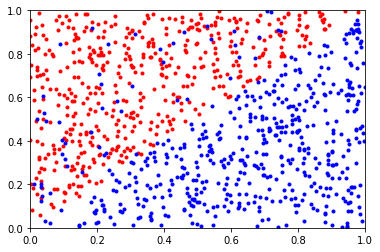

In [47]:
plt.scatter(x[target == 1], y[target == 1], marker='.', color='red')
plt.scatter(x[target == 0], y[target == 0], marker='.', color='blue')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Предсказание на обучающей выборке

In [48]:
clf = SVC(kernel='linear', C=1)
clf.fit(np.vstack([x, y]).T, target.T)
preds = clf.predict(np.vstack([x, y]).T)

In [49]:
np.sum(preds == target) / target.shape[0]

0.93

### График разделяющей прямой

In [50]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - clf.intercept_[0] / w[1]

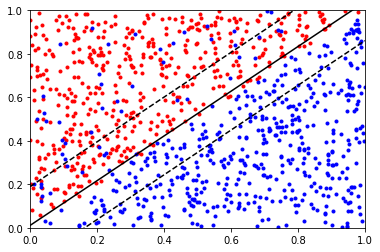

In [51]:
plt.scatter(x[target == 1], y[target == 1], marker='.', color='red')
plt.scatter(x[target == 0], y[target == 0], marker='.', color='blue')

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## Линейно неразделимые классы

### Генерация классов

In [52]:
N = 1000
p = 0.9

x = np.random.rand(N)
y = np.random.rand(N)

target = np.where(y < 10*(x-0.5)**2, 1, 0)

M = target[target == 1].shape[0]
target[target == 1] = np.random.choice([1, 0], M, p=[p, 1-p])

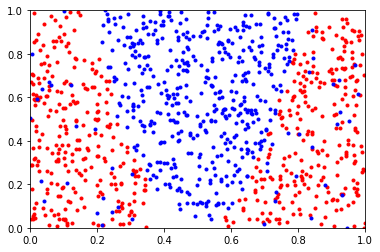

In [53]:
plt.scatter(x[target == 1], y[target == 1], marker='.', color='red')
plt.scatter(x[target == 0], y[target == 0], marker='.', color='blue')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Предсказание на обучающей выборке ("linear" kernel)

In [54]:
clf = SVC(kernel='linear')
clf.fit(np.vstack([x, y]).T, target.T)
preds = clf.predict(np.vstack([x, y]).T)

In [55]:
np.sum(preds == target) / target.shape[0]

0.617

### Предсказание на обучающей выборке ("rbf" kernel)

In [56]:
clf = SVC(kernel='rbf', gamma=1)
clf.fit(np.vstack([x, y]).T, target.T)
preds = clf.predict(np.vstack([x, y]).T)

In [57]:
np.sum(preds == target) / target.shape[0]

0.888

### График разделяющей кривой

In [58]:
h=.01

x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [59]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

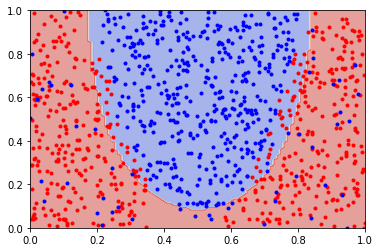

In [60]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(x[target == 1], y[target == 1], marker='.', color='red')
plt.scatter(x[target == 0], y[target == 0], marker='.', color='blue')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()